# Plik roboczy

In [38]:
using Plots
gr()

Plots.GRBackend()

rungekutta4 - źródło kodu:
https://perso.crans.org/besson/publis/notebooks/Runge-Kutta_methods_for_ODE_integration_in_Julia.html

In [39]:
function rungekutta4(f, y0, t)
    n = length(t)
    y = zeros((n, length(y0)))
    y[1,:] = y0
    for i in 1:n-1
        h = t[i+1] - t[i]
        k1 = f(y[i,:], t[i])
        k2 = f(y[i,:] + k1 * h/2, t[i] + h/2)
        k3 = f(y[i,:] + k2 * h/2, t[i] + h/2)
        k4 = f(y[i,:] + k3 * h, t[i] + h)
        y[i+1,:] = y[i,:] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    end
    return y
end

rungekutta4 (generic function with 1 method)

## Równania ruchu piłki

https://indico.cern.ch/event/163205/contributions/1413227/attachments/192775/270516/Team351.pdf

$$ \begin{align}
    &F_g = -mg\hat{y} \\
    &F_w = \rho V g \,\hat{y} = B \, \hat{y} \\
    &F_o = -C_d\rho A v^2 \hat{v} = -bv^2\hat{v} = -b(\dot{x}^2 + \dot{y}^2)^{\frac{1}{2}}(\dot{x}\hat{x} + \dot{y}\hat{y})\\
    &F_M = C_M \rho D^3 \bar{\omega} \times \bar{v} = c \, \bar{\omega} \times \bar{v} = -c \, \omega \dot{y}\hat{x} + c \, \omega \dot{x}\hat{y}\\
\end{align} $$

$$ \begin{cases} m\ddot{x} = -b(\dot{x}^2 + \dot{y}^2)^{\frac{1}{2}}\dot{x} - c\,\omega\,\dot{y} \\
m\ddot{y} = -mg + B -b(\dot{x}^2 + \dot{y}^2)^{\frac{1}{2}}\dot{y} + c\,\omega\,\dot{x} \end{cases}$$

In [40]:
# u = [x, x', y, y']
# u' = [x', x'', y', y'']

g = 9.81
m = 0.623  # z niejasnego mi powodu zmiana masy piłki nie wpływa na wyplotowaną trajektorię...
c = 0.00287
B = 0.0088
b = 0.003
w = 4pi

function basketball_throw(u, t)
    return [u[2], (- b * sqrt(u[2]^2 + u[4]^2) * u[2] - c * w * u[4]) / m,
            u[4], (- m * g + B - b * sqrt(u[2]^2 + u[4]^2) * u[4] + c * w * u[2]) / m]
end

basketball_throw (generic function with 1 method)

$$ \dot{x} = v_0\cos{\theta_0} $$
$$ \dot{y} = v_0\sin{\theta_0} $$

In [49]:
v_0 = 7.8
theta_0 = 48
r_theta_0 = theta_0 / 180 * pi  # [rad]

u0 = [0; v_0*cos(r_theta_0); 0; v_0*sin(r_theta_0)]
tspan = range(0, stop=3, length=100);
sol = rungekutta4(basketball_throw, u0, tspan);

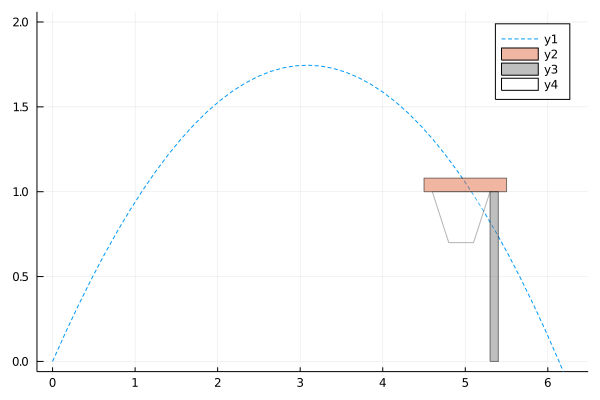

In [52]:
plot(sol[:,1], sol[:,3], xlims=[0,6.3], ylims=[0, 2], linestyle=:dash)

rectangle(w, h, x, y) = Shape(x .+ [0,w,w,0], y .+ [0,0,h,h])
plot!(rectangle(1,0.08,4.5,1), opacity=.5)
plot!(rectangle(0.1,1,5.3,0), opacity=.5, color=:grey)
plot!(Shape([4.6, 5.3, 5.1, 4.8], [1, 1, 0.7, 0.7]), color=:white, opacity = .3)